In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from catboost import CatBoostClassifier
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score

In [ ]:
df = pd.read_csv('../data/AIDS_Classification_50000_balanced.csv')

X = df.drop('infected', axis=1)
y = df['infected']

infected
0    34494
1    34494
Name: count, dtype: int64


In [4]:
lda = LDA(n_components=1)

X_lda = lda.fit_transform(X, y)

print(X_lda)

[[ 0.93517171]
 [-1.42560178]
 [ 2.04899795]
 ...
 [ 0.0666256 ]
 [-0.43633506]
 [-0.54688134]]


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

random forest

Test Accuracy: 0.803957095231193
              precision    recall  f1-score   support

           0       0.87      0.71      0.78      6807
           1       0.76      0.89      0.82      6991

    accuracy                           0.80     13798
   macro avg       0.81      0.80      0.80     13798
weighted avg       0.81      0.80      0.80     13798



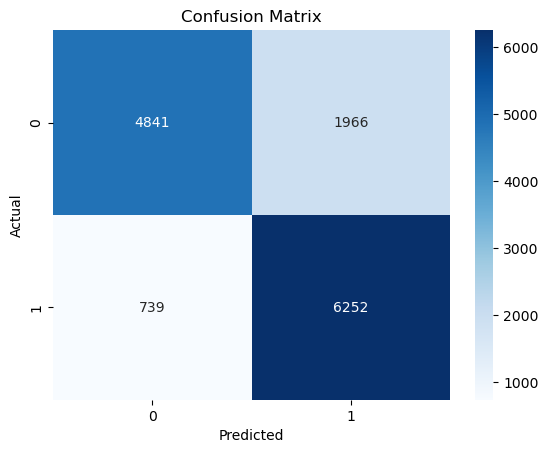

Negative Predictive Value (NPV): 0.8675627240143369


In [16]:
random_forest_classifier = RandomForestClassifier(
    n_estimators=500, 
    max_features='sqrt', 
    random_state=42
)
random_forest_classifier.fit(X_train_lda, y_train)

y_pred = random_forest_classifier.predict(X_test_lda)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Test Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

TN = conf_matrix[0, 0]
FN = conf_matrix[1, 0]
NPV = TN / (TN + FN) if (TN + FN) != 0 else 0
print(f"Negative Predictive Value (NPV): {NPV}")


log reg

Test Accuracy: 0.6493694738367879
              precision    recall  f1-score   support

           0       0.66      0.60      0.63      6807
           1       0.64      0.70      0.67      6991

    accuracy                           0.65     13798
   macro avg       0.65      0.65      0.65     13798
weighted avg       0.65      0.65      0.65     13798



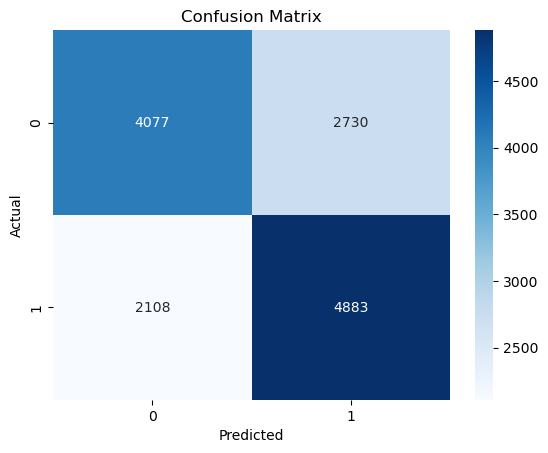

Negative Predictive Value (NPV): 0.6591754244139046


In [17]:
logistic_regression = LogisticRegression(C=0.1, solver='liblinear', random_state=42)
logistic_regression.fit(X_train_lda, y_train)

y_pred = logistic_regression.predict(X_test_lda)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Test Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

TN = conf_matrix[0, 0]
FN = conf_matrix[1, 0]
NPV = TN / (TN + FN) if (TN + FN) != 0 else 0
print(f"Negative Predictive Value (NPV): {NPV}")

adaboost

Test Accuracy: 0.6501666908247572
              precision    recall  f1-score   support

           0       0.66      0.60      0.63      6807
           1       0.64      0.70      0.67      6991

    accuracy                           0.65     13798
   macro avg       0.65      0.65      0.65     13798
weighted avg       0.65      0.65      0.65     13798



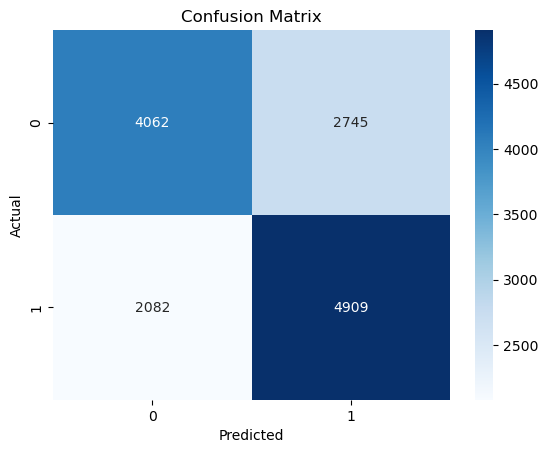

Negative Predictive Value (NPV): 0.6611328125


In [19]:
adaboost_classifier = AdaBoostClassifier(
    n_estimators=100, 
    learning_rate=0.1, 
    random_state=42
)
adaboost_classifier.fit(X_train_lda, y_train)

y_pred = adaboost_classifier.predict(X_test_lda)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Test Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

TN = conf_matrix[0, 0]
FN = conf_matrix[1, 0]
NPV = TN / (TN + FN) if (TN + FN) != 0 else 0
print(f"Negative Predictive Value (NPV): {NPV}")

catboost

Test Accuracy: 0.6504565879112915
              precision    recall  f1-score   support

           0       0.66      0.61      0.63      6807
           1       0.65      0.69      0.67      6991

    accuracy                           0.65     13798
   macro avg       0.65      0.65      0.65     13798
weighted avg       0.65      0.65      0.65     13798



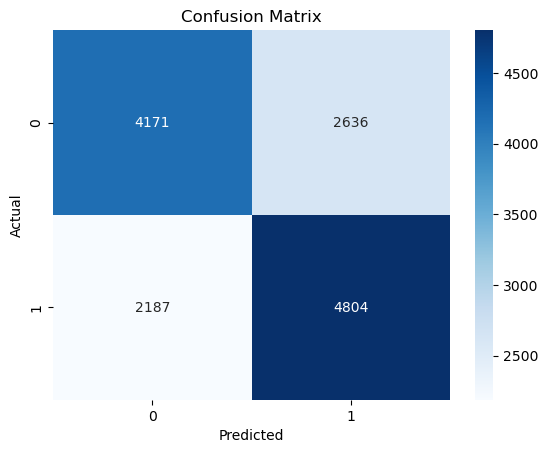

Negative Predictive Value (NPV): 0.6560239068889588


In [18]:
catboost_classifier = CatBoostClassifier(
    n_estimators=50, 
    learning_rate=0.1, 
    verbose=0,
    random_state=42
)
catboost_classifier.fit(X_train_lda, y_train)

y_pred = catboost_classifier.predict(X_test_lda)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Test Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

TN = conf_matrix[0, 0]
FN = conf_matrix[1, 0]
NPV = TN / (TN + FN) if (TN + FN) != 0 else 0
print(f"Negative Predictive Value (NPV): {NPV}")